In [175]:
from google.colab import files
uploaded = files.upload()


Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn (3).csv


In [176]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [177]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [178]:
# Checking for null values
null_values = df.isnull().sum()
print("Number of null values in each column:")
print(null_values)

# Checking for duplicates
duplicate_values=df.duplicated().sum()
print("Number of duplicate values in each column:")
print(duplicate_values)

# checking for missing values
missing_values = df.isna().sum()
print("Number of missing values in each column:")
print(missing_values)




Number of null values in each column:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
Number of duplicate values in each column:
0
Number of missing values in each column:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Month

In [179]:
# Displayed basic information about the dataset
df.info()

# Displayed summary statistics for numerical columns
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [180]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Selecte numerical and categorical columns
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                    'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

# Replace empty strings in numerical columns with NaN
df[numerical_cols] = df[numerical_cols].replace(' ', np.nan)

# Define preprocessing steps for numerical and categorical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Impute missing values with median
    ('scaler', StandardScaler())  # Standardize numerical features
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Impute missing values with a new category
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

# Combine preprocessing steps for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Apply preprocessing to the entire dataset
processed_data = preprocessor.fit_transform(df)


In [181]:
processed_data

array([[-1.27744458, -1.16032292, -0.99424194, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.06632742, -0.25962894, -0.17324413, ...,  0.        ,
         0.        ,  1.        ],
       [-1.23672422, -0.36266036, -0.95967407, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.87024095, -1.1686319 , -0.85446945, ...,  0.        ,
         1.        ,  0.        ],
       [-1.15528349,  0.32033821, -0.87206242, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.36937906,  1.35896134,  2.01428802, ...,  0.        ,
         0.        ,  0.        ]])

In [182]:
# Here the processed data have 46 features as it seperated the categorical data into different features.

num_features = processed_data.shape[1]
print("Number of features:", num_features)


Number of features: 46


In [183]:
preprocessor.fit(df)
# Get numerical feature names
numerical_feature_names = preprocessor.named_transformers_['num']['scaler'].get_feature_names_out(numerical_cols)

# Get categorical feature names after one-hot encoding
categorical_feature_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_cols)

# Concatenate numerical and categorical feature names
feature_names = np.concatenate([numerical_feature_names, categorical_feature_names])

# Print the feature names
print(feature_names)

['tenure' 'MonthlyCharges' 'TotalCharges' 'gender_Female' 'gender_Male'
 'SeniorCitizen_0' 'SeniorCitizen_1' 'Partner_No' 'Partner_Yes'
 'Dependents_No' 'Dependents_Yes' 'PhoneService_No' 'PhoneService_Yes'
 'MultipleLines_No' 'MultipleLines_No phone service' 'MultipleLines_Yes'
 'InternetService_DSL' 'InternetService_Fiber optic' 'InternetService_No'
 'OnlineSecurity_No' 'OnlineSecurity_No internet service'
 'OnlineSecurity_Yes' 'OnlineBackup_No' 'OnlineBackup_No internet service'
 'OnlineBackup_Yes' 'DeviceProtection_No'
 'DeviceProtection_No internet service' 'DeviceProtection_Yes'
 'TechSupport_No' 'TechSupport_No internet service' 'TechSupport_Yes'
 'StreamingTV_No' 'StreamingTV_No internet service' 'StreamingTV_Yes'
 'StreamingMovies_No' 'StreamingMovies_No internet service'
 'StreamingMovies_Yes' 'Contract_Month-to-month' 'Contract_One year'
 'Contract_Two year' 'PaperlessBilling_No' 'PaperlessBilling_Yes'
 'PaymentMethod_Bank transfer (automatic)'
 'PaymentMethod_Credit card (a

In [184]:
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Assuming 'processed_data' contains your preprocessed dataset with features and target variable

# Select numerical and categorical columns
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                    'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

# Define feature matrix X and target vector y
X = processed_data
y = df['Churn']  # Assuming Churn is your target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Perform SMOTE on the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Now X_train_resampled, y_train_resampled, X_test, and y_test are ready for model training and evaluation


In [185]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize Logistic Regression model
logistic_regression_model = LogisticRegression(random_state=42)

# Train the Logistic Regression model
logistic_regression_model.fit(X_train_resampled, y_train_resampled)

# Predict on the test data
y_pred_logistic_regression = logistic_regression_model.predict(X_test)

# Evaluate the Logistic Regression model
accuracy_logistic_regression = accuracy_score(y_test, y_pred_logistic_regression)
print("\nLogistic Regression Model:")
print(f"Accuracy: {accuracy_logistic_regression}")
print("Classification Report:")
print(classification_report(y_test, y_pred_logistic_regression))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logistic_regression))



Logistic Regression Model:
Accuracy: 0.7551454932576295
Classification Report:
              precision    recall  f1-score   support

          No       0.92      0.73      0.81      1036
         Yes       0.52      0.84      0.64       373

    accuracy                           0.76      1409
   macro avg       0.72      0.78      0.73      1409
weighted avg       0.82      0.76      0.77      1409

Confusion Matrix:
[[752 284]
 [ 61 312]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [186]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize Random Forest model
random_forest_model = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=20, min_samples_leaf=5, max_features='auto', bootstrap=True, random_state=42)

# Train the Random Forest model
random_forest_model.fit(X_train_resampled, y_train_resampled)

# Predict on the test data
y_pred_random_forest = random_forest_model.predict(X_test)

# Evaluate the Random Forest model
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
print("\nRandom Forest Model:")
print(f"Accuracy: {accuracy_random_forest}")
print("Classification Report:")
print(classification_report(y_test, y_pred_random_forest))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_random_forest))


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(



Random Forest Model:
Accuracy: 0.7885024840312278
Classification Report:
              precision    recall  f1-score   support

          No       0.89      0.81      0.85      1036
         Yes       0.58      0.72      0.64       373

    accuracy                           0.79      1409
   macro avg       0.74      0.77      0.75      1409
weighted avg       0.81      0.79      0.79      1409

Confusion Matrix:
[[844 192]
 [106 267]]


In [187]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize Decision Tree model
decision_tree_model = DecisionTreeClassifier(min_samples_split=2, min_samples_leaf=2, max_depth=1, max_features=None, criterion='gini', splitter='best', random_state=42)

# Train the Decision Tree model
decision_tree_model.fit(X_train_resampled, y_train_resampled)

# Predict on the test data
y_pred_decision_tree = decision_tree_model.predict(X_test)

# Evaluate the Decision Tree model
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
print("\nDecision Tree Model:")
print(f"Accuracy: {accuracy_decision_tree}")
print("Classification Report:")
print(classification_report(y_test, y_pred_decision_tree))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_decision_tree))



Decision Tree Model:
Accuracy: 0.6557842441447835
Classification Report:
              precision    recall  f1-score   support

          No       0.95      0.56      0.71      1036
         Yes       0.43      0.91      0.58       373

    accuracy                           0.66      1409
   macro avg       0.69      0.74      0.65      1409
weighted avg       0.81      0.66      0.67      1409

Confusion Matrix:
[[584 452]
 [ 33 340]]


In [197]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the labels in the training set
y_train_encoded = label_encoder.fit_transform(y_train_resampled)

# Transform the labels in the test set
y_test_encoded = label_encoder.transform(y_test)

# Step 2: Initialize the XGBoost model
xgboost_model = xgb.XGBClassifier(random_state=42)

# Step 3: Train the XGBoost model
xgboost_model.fit(X_train_resampled, y_train_encoded)

# Step 4: Evaluate the XGBoost model
y_pred_xgboost = xgboost_model.predict(X_test)
accuracy_xgboost = accuracy_score(y_test_encoded, y_pred_xgboost)

#Step 5:Extract features from the trained XGBoost model
xgboost_features = xgboost_model.apply(X_train_resampled)

print("\nXGBoost Model:")
print(f"Accuracy: {accuracy_xgboost}")
print("Classification Report:")
print(classification_report(y_test_encoded, y_pred_xgboost))
print("Confusion Matrix:")
print(confusion_matrix(y_test_encoded, y_pred_xgboost))
print(xgboost_features.shape[1])



XGBoost Model:
Accuracy: 0.7906316536550745
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1036
           1       0.61      0.59      0.60       373

    accuracy                           0.79      1409
   macro avg       0.73      0.73      0.73      1409
weighted avg       0.79      0.79      0.79      1409

Confusion Matrix:
[[893 143]
 [152 221]]
100


In [189]:
from sklearn.ensemble import GradientBoostingClassifier

# Step 2: Initialize the Gradient Boosting model
gradient_boosting_model = GradientBoostingClassifier(random_state=42)

# Step 3: Train the Gradient Boosting model
gradient_boosting_model.fit(X_train_resampled, y_train_resampled)

# Step 4: Evaluate the Gradient Boosting model
y_pred_gradient_boosting = gradient_boosting_model.predict(X_test)
accuracy_gradient_boosting = accuracy_score(y_test, y_pred_gradient_boosting)

print("\nGradient Boosting Model:")
print(f"Accuracy: {accuracy_gradient_boosting}")
print("Classification Report:")
print(classification_report(y_test, y_pred_gradient_boosting))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gradient_boosting))



Gradient Boosting Model:
Accuracy: 0.794889992902768
Classification Report:
              precision    recall  f1-score   support

          No       0.89      0.82      0.85      1036
         Yes       0.59      0.72      0.65       373

    accuracy                           0.79      1409
   macro avg       0.74      0.77      0.75      1409
weighted avg       0.81      0.79      0.80      1409

Confusion Matrix:
[[850 186]
 [103 270]]


In [190]:
############################################################################################################################

                                    Feature  Importance
37                  Contract_Month-to-month    0.124722
0                                    tenure    0.105446
19                        OnlineSecurity_No    0.081264
44           PaymentMethod_Electronic check    0.068494
2                              TotalCharges    0.065609
39                        Contract_Two year    0.059586
1                            MonthlyCharges    0.052526
28                           TechSupport_No    0.045818
17              InternetService_Fiber optic    0.030393
38                        Contract_One year    0.028199
22                          OnlineBackup_No    0.027186
21                       OnlineSecurity_Yes    0.022644
41                     PaperlessBilling_Yes    0.019377
40                      PaperlessBilling_No    0.017836
25                      DeviceProtection_No    0.015503
30                          TechSupport_Yes    0.014971
16                      InternetService_DSL    0

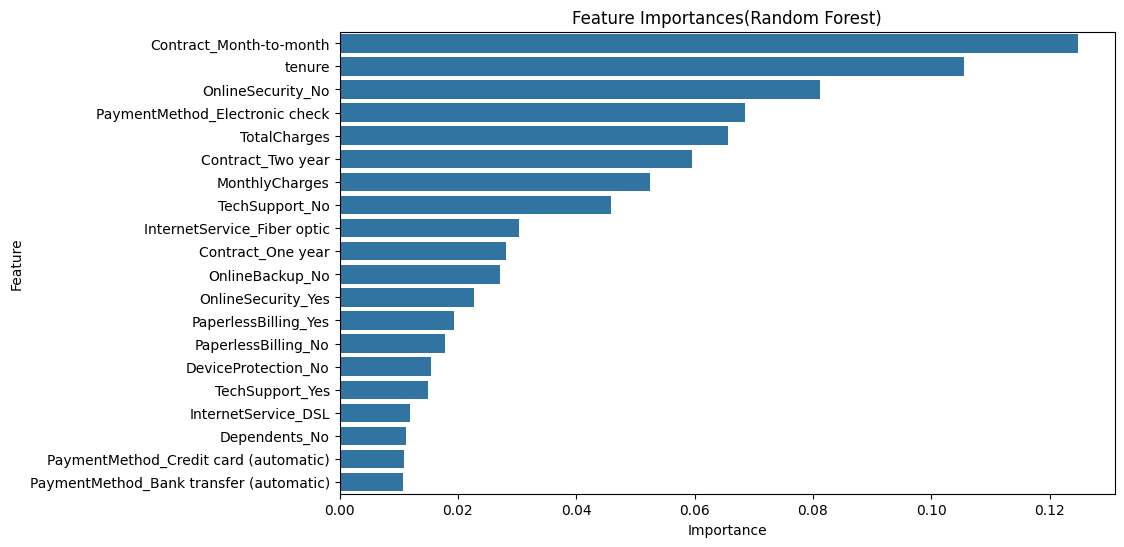

In [191]:
# Get feature importances from the trained Random Forest model
feature_importances = random_forest_model.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)
# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df[:20])  # Plot the top 20 features
plt.title('Feature Importances(Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [192]:
from sklearn.feature_selection import RFE

# Initialize Random Forest model with the desired parameters
random_forest_model = RandomForestClassifier(n_estimators=100,random_state=42)

# Initialize RFE with Random Forest model
rfe = RFE(random_forest_model)  # Select top 10 features, you can adjust this number as needed

# Fit RFE on resampled data
rfe.fit(X_train_resampled, y_train_resampled)

# Get selected features
selected_features = rfe.support_

# Filter the processed data to keep only the selected features
X_train_rfe = X_train_resampled[:, selected_features]
X_test_rfe = X_test[:, selected_features]



In [193]:
# Get selected features
selected_features_mask = rfe.support_

# Get names of all features
all_feature_names = np.array(feature_names)

# Get names of selected features
selected_feature_names = all_feature_names[selected_features_mask]

print("Selected Features(Random Forest):")
print(selected_feature_names)


Selected Features(Random Forest):
['tenure' 'MonthlyCharges' 'TotalCharges' 'gender_Female'
 'SeniorCitizen_1' 'Partner_No' 'Dependents_No' 'MultipleLines_No'
 'InternetService_Fiber optic' 'OnlineSecurity_No' 'OnlineSecurity_Yes'
 'OnlineBackup_No' 'DeviceProtection_No' 'TechSupport_No'
 'StreamingTV_Yes' 'StreamingMovies_Yes' 'Contract_Month-to-month'
 'Contract_One year' 'Contract_Two year' 'PaperlessBilling_No'
 'PaperlessBilling_Yes' 'PaymentMethod_Credit card (automatic)'
 'PaymentMethod_Electronic check']


                                    Feature  Importance
37                  Contract_Month-to-month    0.344949
19                        OnlineSecurity_No    0.071186
41                     PaperlessBilling_Yes    0.048392
36                      StreamingMovies_Yes    0.041082
8                               Partner_Yes    0.039429
44           PaymentMethod_Electronic check    0.031846
38                        Contract_One year    0.029738
28                           TechSupport_No    0.029276
17              InternetService_Fiber optic    0.028779
16                      InternetService_DSL    0.025390
39                        Contract_Two year    0.020127
11                          PhoneService_No    0.019026
13                         MultipleLines_No    0.018438
34                       StreamingMovies_No    0.016620
22                          OnlineBackup_No    0.016434
31                           StreamingTV_No    0.016275
40                      PaperlessBilling_No    0

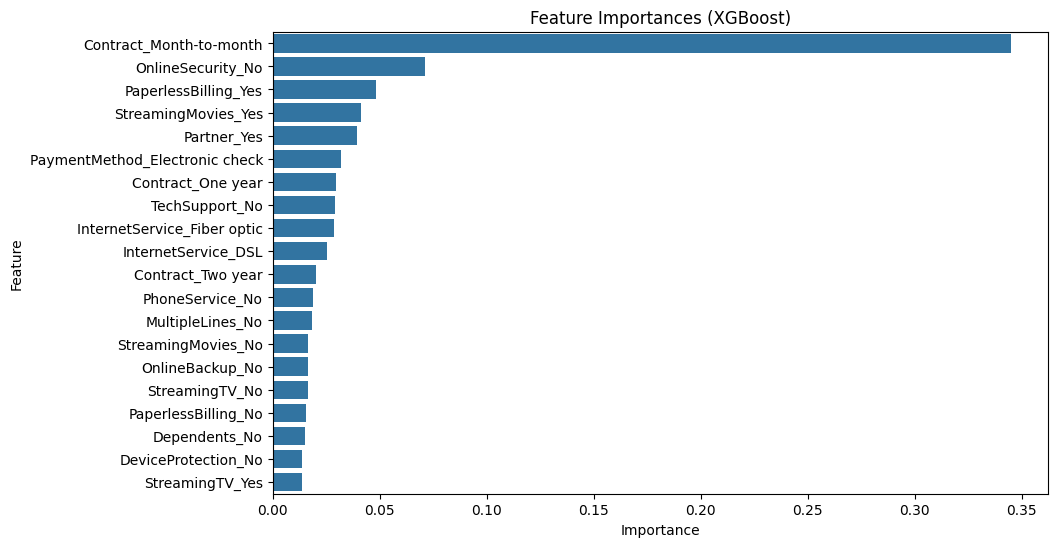

In [194]:
# Get feature importances from the trained XGBoost model
feature_importances_xgb = xgboost_model.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df_xgb = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances_xgb})

# Sort the features by importance in descending order
feature_importance_df_xgb = feature_importance_df_xgb.sort_values(by='Importance', ascending=False)
print(feature_importance_df_xgb)
# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_xgb[:20])  # Plot the top 20 features
plt.title('Feature Importances (XGBoost)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [200]:
from sklearn.feature_selection import RFE


# Initialize XGBoost model with the desired parameters
xgboost_model = xgb.XGBClassifier(random_state=42)
# Fit and transform the labels in the training set
y_train_encoded = label_encoder.fit_transform(y_train_resampled)

# Transform the labels in the test set
y_test_encoded = label_encoder.transform(y_test)

# Initialize RFE with XGBoost model
rfe_xgb = RFE(xgboost_model)  # Select features
# Fit RFE on resampled data
rfe_xgb.fit(X_train_resampled, y_train_encoded)

# Get selected features
selected_features_xgb = rfe_xgb.support_

# Get names of all features
all_feature_names_xgb = np.array(feature_names)

# Get names of selected features
selected_feature_names_xgb = all_feature_names_xgb[selected_features_xgb]

print("Selected Features (XGBoost):")
print(selected_feature_names_xgb)


Selected Features (XGBoost):
['gender_Female' 'SeniorCitizen_0' 'Partner_Yes' 'Dependents_No'
 'MultipleLines_No' 'MultipleLines_Yes' 'InternetService_DSL'
 'InternetService_Fiber optic' 'OnlineSecurity_No' 'OnlineBackup_No'
 'DeviceProtection_No' 'TechSupport_No' 'StreamingTV_No'
 'StreamingMovies_No' 'StreamingMovies_Yes' 'Contract_Month-to-month'
 'Contract_One year' 'Contract_Two year' 'PaperlessBilling_No'
 'PaperlessBilling_Yes' 'PaymentMethod_Bank transfer (automatic)'
 'PaymentMethod_Credit card (automatic)' 'PaymentMethod_Electronic check']


In [202]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the labels in the training set
y_train_encoded = label_encoder.fit_transform(y_train_resampled)

# Transform the labels in the test set
y_test_encoded = label_encoder.transform(y_test)

# Step 2: Initialize the XGBoost model
xgboost_model = xgb.XGBClassifier(random_state=42)

# Step 3: Train the XGBoost model
xgboost_model.fit(X_train_resampled, y_train_encoded)

# Step 4: Evaluate the XGBoost model
y_pred_xgboost = xgboost_model.predict(X_test)
accuracy_xgboost = accuracy_score(y_test_encoded, y_pred_xgboost)

#Step 5:Extract features from the trained XGBoost model
xgboost_features = xgboost_model.apply(X_train_resampled)



############################################################


selected_features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'gender_Female', 'gender_Male',
 'SeniorCitizen_0', 'SeniorCitizen_1', 'Partner_No', 'Partner_Yes',
 'Dependents_No', 'Dependents_Yes', 'PhoneService_No', 'PhoneService_Yes',
 'MultipleLines_No', 'MultipleLines_No phone service', 'MultipleLines_Yes',
 'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No',
 'OnlineSecurity_No', 'OnlineSecurity_No internet service',
 'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_No internet service',
 'OnlineBackup_Yes', 'DeviceProtection_No',
 'DeviceProtection_No internet service', 'DeviceProtection_Yes',
 'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
 'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
 'StreamingMovies_No', 'StreamingMovies_No internet service',
 'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
 'Contract_Two year', 'PaperlessBilling_No', 'PaperlessBilling_Yes',
 'PaymentMethod_Bank transfer (automatic)',
 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check']
def collect_user_input(selected_features):
    features_input = {}

    # Initialize all features with default values
    for feature in selected_features:
        features_input[feature] = 0

    # Define conflicts
    conflicts = {
        'gender_Female': ['gender_Male'],
        'gender_Male': ['gender_Female'],
        'SeniorCitizen_0': ['SeniorCitizen_1'],
        'SeniorCitizen_1': ['SeniorCitizen_0'],
        'Partner_Yes': ['Partner_No'],
        'Partner_No': ['Partner_Yes'],
        'Dependents_Yes': ['Dependents_No'],
        'Dependents_No': ['Dependents_Yes'],
        'PhoneService_No': ['PhoneService_Yes'],
        'PhoneService_Yes': ['PhoneService_No'],
        'InternetService_DSL': ['InternetService_Fiber optic', 'InternetService_No'],
        'InternetService_Fiber optic': ['InternetService_DSL', 'InternetService_No'],
        'InternetService_No': ['InternetService_DSL', 'InternetService_Fiber optic'],
        'OnlineSecurity_No': ['OnlineSecurity_Yes'],
        'OnlineSecurity_Yes': ['OnlineSecurity_No'],
        'OnlineBackup_No': ['OnlineBackup_Yes'],
        'OnlineBackup_Yes': ['OnlineBackup_No'],
        'DeviceProtection_No': ['DeviceProtection_Yes'],
        'DeviceProtection_Yes': ['DeviceProtection_No'],
        'TechSupport_No': ['TechSupport_Yes'],
        'TechSupport_Yes': ['TechSupport_No'],
        'StreamingTV_No': ['StreamingTV_Yes'],
        'StreamingTV_Yes': ['StreamingTV_No'],
        'StreamingMovies_No': ['StreamingMovies_Yes'],
        'StreamingMovies_Yes': ['StreamingMovies_No'],
        'Contract_Month-to-month': ['Contract_One year', 'Contract_Two year'],
        'Contract_One year': ['Contract_Month-to-month', 'Contract_Two year'],
        'Contract_Two year': ['Contract_Month-to-month', 'Contract_One year'],
        'PaperlessBilling_No': ['PaperlessBilling_Yes'],
        'PaperlessBilling_Yes': ['PaperlessBilling_No'],
        'PaymentMethod_Bank transfer (automatic)': ['PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
        'PaymentMethod_Credit card (automatic)': ['PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
        'PaymentMethod_Electronic check': ['PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check'],
        'PaymentMethod_Mailed check': ['PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check']
    }

    # Collect user input for each selected feature
    for feature in selected_features:
        # Split feature name to create a more user-friendly prompt
        prompt = "Enter 1 if {}, 0 otherwise: ".format(feature.replace('_', ' ').replace('0', 'No').replace('1', 'Yes'))
        while True:  # Input validation loop
            try:
                value = int(input(prompt))
                if value in [0, 1]:
                    # Check for conflicts
                    if feature in conflicts:
                        for conflict_feature in conflicts[feature]:
                            if value == 1 and features_input.get(conflict_feature, 0) == 1:
                                print(f"Conflicting input! Please choose only one option between {feature} and {conflict_feature}.")
                                break
                        else:
                            features_input[feature] = value
                            break
                    else:
                        features_input[feature] = value
                        break
                else:
                    print("Please enter 0 or 1.")
            except ValueError:
                print("Please enter a valid integer (0 or 1).")

    return features_input


def predict_churn(user_data, selected_features, xgboost_model):
    # Convert user_data dict to a list in the order of selected_features
    input_data = [user_data.get(feature, 0) for feature in selected_features]

    # Assuming your XGBoost model is loaded as xgboost_model and prepared to accept the selected features
    probability_of_churn = xgboost_model.predict_proba([input_data])[0][1]  # Accessing the probability of class 1
    return probability_of_churn

# Main script
if __name__ == "__main__":
    # Assuming xgboost_model is trained and available in this scope
    user_data = collect_user_input(selected_features)
    churn_probability = predict_churn(user_data, selected_features, xgboost_model)
    print(f"Probability of Churn: {churn_probability:.2f}")  # Probability of the positive class (class 1)

Enter 1 if tenure, 0 otherwise: 0
Enter 1 if MonthlyCharges, 0 otherwise: 1
Enter 1 if TotalCharges, 0 otherwise: 0
Enter 1 if gender Female, 0 otherwise: 1
Enter 1 if gender Male, 0 otherwise: 0
Enter 1 if SeniorCitizen No, 0 otherwise: 1
Enter 1 if SeniorCitizen Yes, 0 otherwise: 0
Enter 1 if Partner No, 0 otherwise: 
Please enter a valid integer (0 or 1).
Enter 1 if Partner No, 0 otherwise: 0
Enter 1 if Partner Yes, 0 otherwise: 0
Enter 1 if Dependents No, 0 otherwise: 0
Enter 1 if Dependents Yes, 0 otherwise: 0
Enter 1 if PhoneService No, 0 otherwise: 0
Enter 1 if PhoneService Yes, 0 otherwise: 0
Enter 1 if MultipleLines No, 0 otherwise: 0
Enter 1 if MultipleLines No phone service, 0 otherwise: 0
Enter 1 if MultipleLines Yes, 0 otherwise: 0
Enter 1 if InternetService DSL, 0 otherwise: 0
Enter 1 if InternetService Fiber optic, 0 otherwise: 0
Enter 1 if InternetService No, 0 otherwise: 0
Enter 1 if OnlineSecurity No, 0 otherwise: 0
Enter 1 if OnlineSecurity No internet service, 0 oth